In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
from matplotlib import pyplot as plt
!pip install openpyxl

In [93]:
data = pd.read_excel('/Users/arunprakash/Downloads/sales_data_sample.xlsx')
data.shape
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## DATA CLEANUP - 

## 1. null values

In [174]:
100*data.isnull().mean()

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [175]:
data_sales = data[~data.STATUS.isin(['Disputed', 'Cancelled', 'On Hold'])]
data.groupby('STATUS').size()

STATUS
Cancelled       60
Disputed        14
In Process      41
On Hold         44
Resolved        47
Shipped       2617
dtype: int64

In [176]:
#89% of Addressline2 is empty ,State Can be dropped.
#Disputed ,Cancelled , Onhold sales are out of scope for actual sales projection

In [177]:
#DROP NULL VALUES AND UNNECESSARY COLUMNS
sales_data = data_sales.drop(columns=['ADDRESSLINE2', 'STATE','PHONE','ORDERDATE','ORDERLINENUMBER','CONTACTLASTNAME','CONTACTFIRSTNAME','POSTALCODE','PRODUCTCODE'])

## 2. IMPUTE

In [178]:
sales_data.shape

(2705, 16)

In [179]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000
mean,10256.270610,34.954898,83.578606,3544.158713,2.732717,7.139741,2003.793715,100.848429
std,91.342919,9.432148,20.292935,1827.922803,1.216831,3.700870,0.692012,40.465897
min,10100.000000,6.000000,26.880000,482.130000,1.000000,1.000000,2003.000000,33.000000
25%,10178.000000,27.000000,68.490000,2200.000000,2.000000,4.000000,2003.000000,68.000000
50%,10261.000000,35.000000,95.800000,3182.970000,3.000000,8.000000,2004.000000,99.000000
75%,10331.000000,43.000000,100.000000,4498.190000,4.000000,11.000000,2004.000000,127.000000
max,10425.000000,97.000000,100.000000,12536.500000,4.000000,12.000000,2005.000000,214.000000


#Observation 

#1. 2705 sales order are either in Process,resolved or Shipped with average price of each item to be dollars 83.5   

#2. Max manufacturer selling Price is 214 dollars  

#3. Minimum sales order amount was of 482 dollars . Average sales order amount was of 3544 dollars

#4. Minimum number of items ordered is 6 and Maximum number of items was 97


In [180]:
#NA was being read as not applicable rather North America, Japan,Singapore ,Philipines come in APAC.
sales_data.COUNTRY.unique()
sales_data['TERRITORY'] = sales_data.apply(lambda x: 'NAM' if x['COUNTRY'] in ['USA', 'Canada'] else x['TERRITORY'], axis=1)
sales_data['TERRITORY'] = sales_data.apply(lambda x: 'APAC' if x['COUNTRY'] in ['Japan','Philippines', 'Singapore'] else x['TERRITORY'], axis=1)

In [181]:
sales_data['TERRITORY'].unique()

array(['NAM', 'EMEA', 'APAC'], dtype=object)

In [182]:
100*sales_data.isnull().mean()

ORDERNUMBER        0.0
QUANTITYORDERED    0.0
PRICEEACH          0.0
SALES              0.0
STATUS             0.0
QTR_ID             0.0
MONTH_ID           0.0
YEAR_ID            0.0
PRODUCTLINE        0.0
MSRP               0.0
CUSTOMERNAME       0.0
ADDRESSLINE1       0.0
CITY               0.0
COUNTRY            0.0
TERRITORY          0.0
DEALSIZE           0.0
dtype: float64

In [183]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2871.00,Shipped,1,2,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,NAM,Small
1,10121,34,81.35,2765.90,Shipped,2,5,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,France,EMEA,Small
2,10134,41,94.74,3884.34,Shipped,3,7,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Medium
3,10145,45,83.26,3746.70,Shipped,3,8,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,USA,NAM,Medium
4,10159,49,100.00,5205.27,Shipped,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,USA,NAM,Medium


##  Sales Amount per Year and Month

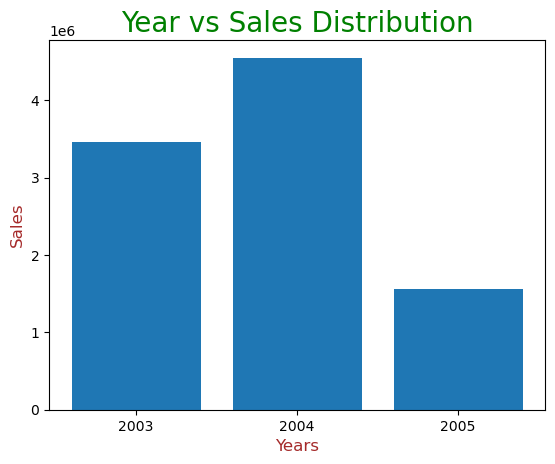

In [184]:
groupdata_year = sales_data.groupby('YEAR_ID')['SALES'].sum()
plt.bar(groupdata_year.index,groupdata_year.values)
plt.xticks(groupdata_year.index)
plt.title('Year vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Years',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

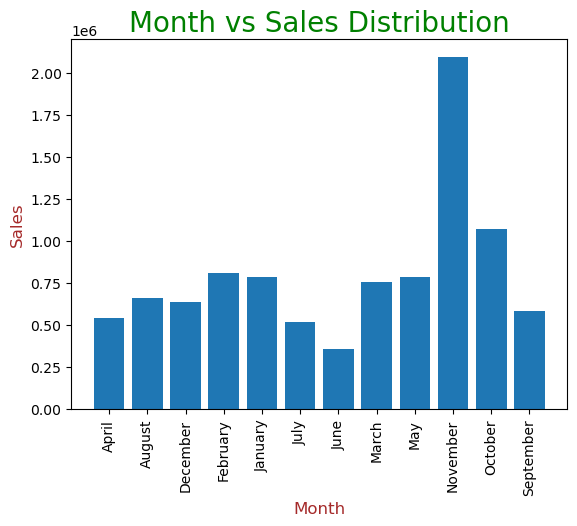

In [186]:
#month_name = calendar.month_name[numeric_month]
sales_data['Month_name']=sales_data.MONTH_ID.apply(lambda x: calendar.month_name[x])
#sales data by month
groupdata_month = sales_data.groupby('Month_name')['SALES'].sum()
#plot the data
plt.bar(groupdata_month.index,groupdata_month.values)
plt.xticks(rotation=90)
plt.title('Month vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Month',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

#Observation:  
#1. How do sales vary by quarter, month, and year? -> 
#2.Highest sales have happened in months of Novemeber and in Year 2004
#3.Lowest sales have happened in June.

## Sales Amount per order per year

In [187]:
sales_data['avg_amt_per_order']= sales_data['SALES']/sales_data['ORDERNUMBER'].nunique()
sales_data.avg_amt_per_order

0        9.699324
1        9.344257
2       13.122770
3       12.657770
4       17.585372
          ...    
2817    13.786216
2818     7.582432
2819    13.440912
2820    18.302601
2821     7.149189
Name: avg_amt_per_order, Length: 2705, dtype: float64

In [188]:
sales_data.groupby('YEAR_ID')['avg_amt_per_order'].mean()

YEAR_ID
2003    11.907646
2004    11.875524
2005    12.423510
Name: avg_amt_per_order, dtype: float64

#Observation:  
#1. Average Sales amount per year has gradually increased from 2003 till 2005

## Number of Sales basis - 1. Year on Year 2. Month on Month 3. Quarter on Quarter

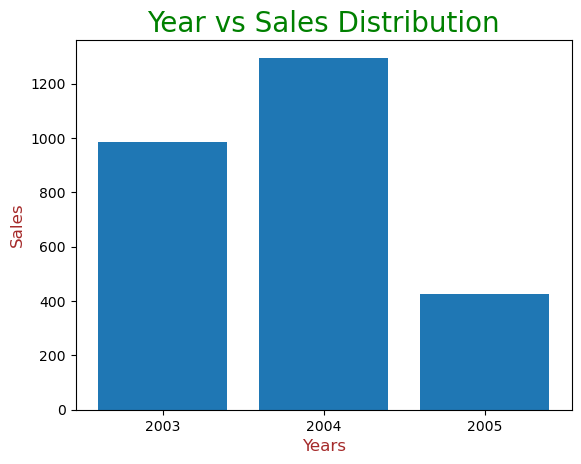

In [189]:
groupdata_year = sales_data.groupby('YEAR_ID')['SALES'].size()
plt.bar(groupdata_year.index,groupdata_year.values)
plt.xticks(groupdata_year.index)
plt.title('Year vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Years',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

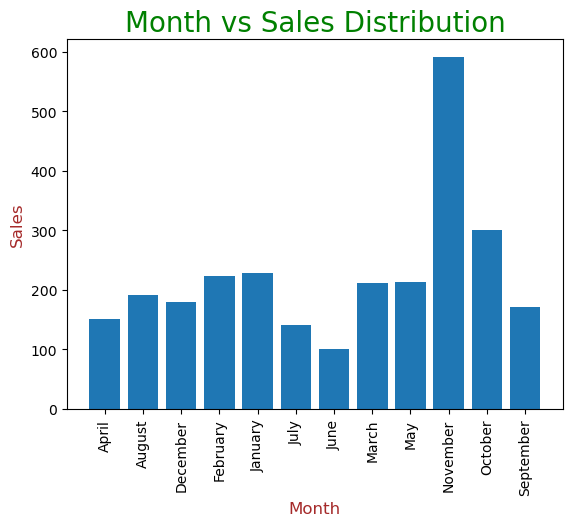

In [190]:
#month_name = calendar.month_name[numeric_month]
sales_data['Month_name']=sales_data.MONTH_ID.apply(lambda x: calendar.month_name[x])
#sales data by month
groupdata_month = sales_data.groupby('Month_name')['SALES'].size()
#plot the data
plt.bar(groupdata_month.index,groupdata_month.values)
plt.xticks(rotation=90)
plt.title('Month vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Month',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

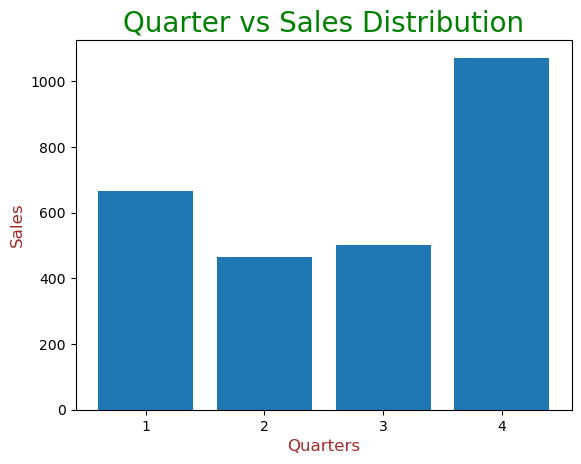

In [192]:
groupdata_year = sales_data.groupby('QTR_ID')['SALES'].size()
plt.bar(groupdata_year.index,groupdata_year.values)
plt.xticks(groupdata_year.index)
plt.title('Quarter vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Quarters',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

#Observation:  
#1. Highest Number of sales occur in last quarter(Specifically November) and highest sales have happened in 2004.

# Number of sales by country 

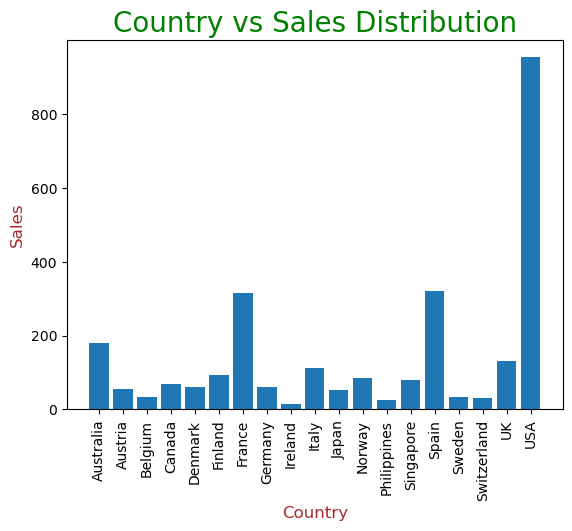

In [197]:

groupdata_country = sales_data.groupby('COUNTRY')['SALES'].size()
#plot the data
plt.bar(groupdata_country.index,groupdata_country.values)
plt.xticks(rotation=90)
plt.title('Country vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Country',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

## Number of sales by city

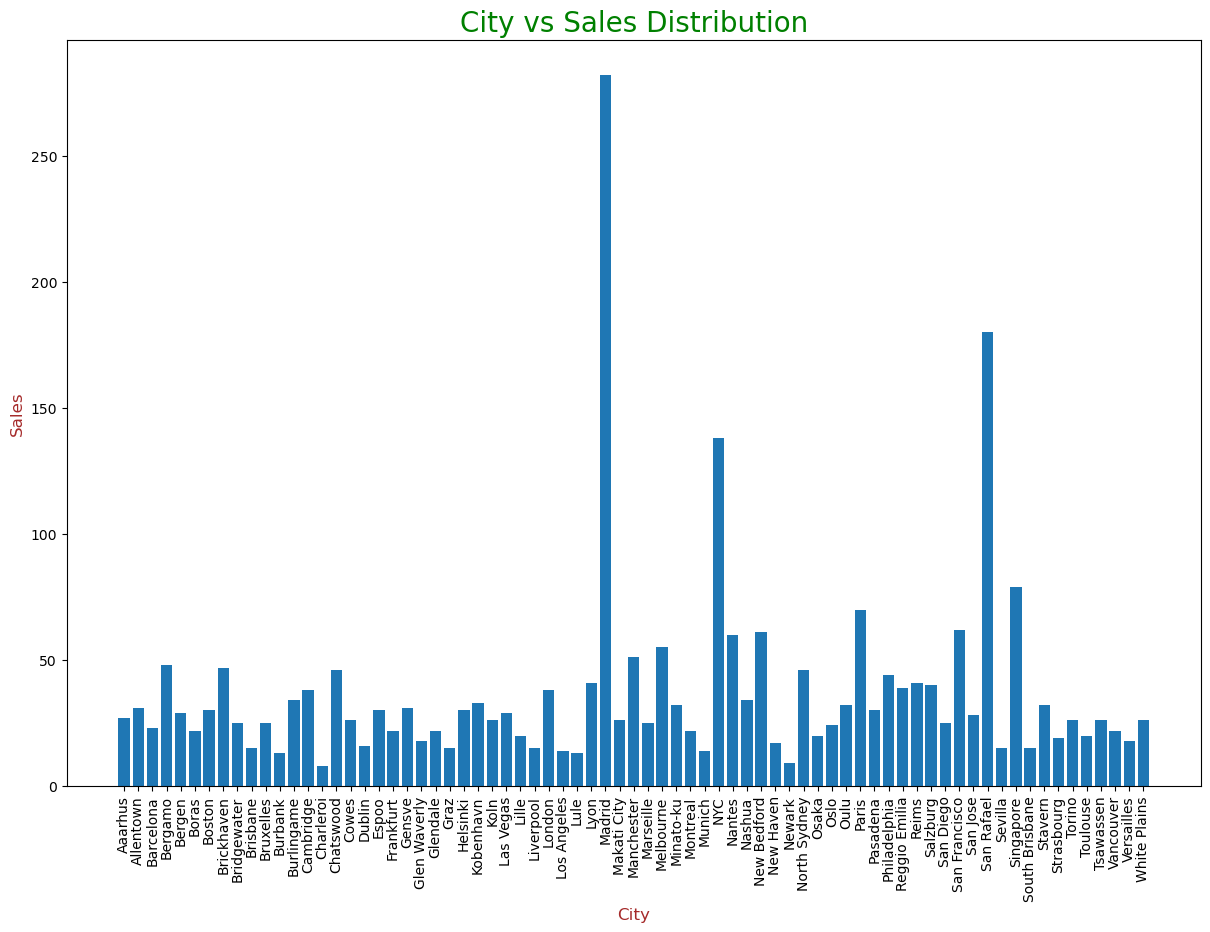

In [200]:
plt.figure(figsize=(12, 8))
groupdata_city = sales_data.groupby('CITY')['SALES'].size()
#plot the data
plt.bar(groupdata_city.index,groupdata_city.values)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('City vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('City',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()


## Number of sales by territory

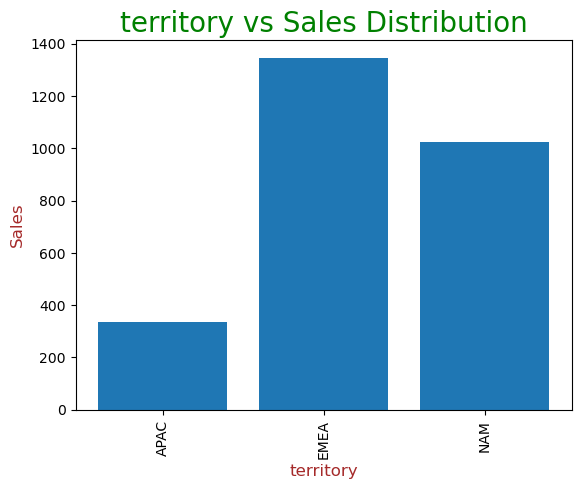

In [201]:
groupdata_territory = sales_data.groupby('TERRITORY')['SALES'].size()
#plot the data
plt.bar(groupdata_territory.index,groupdata_territory.values)
plt.xticks(rotation=90)
plt.title('territory vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('territory',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

#Observation : 
#Overall EMEA is highest selling territory, USA has highest sales among countries, Madrid in Spain is responsible for 50% higher sales than next city San rafael on city level

## Number of sales by productline

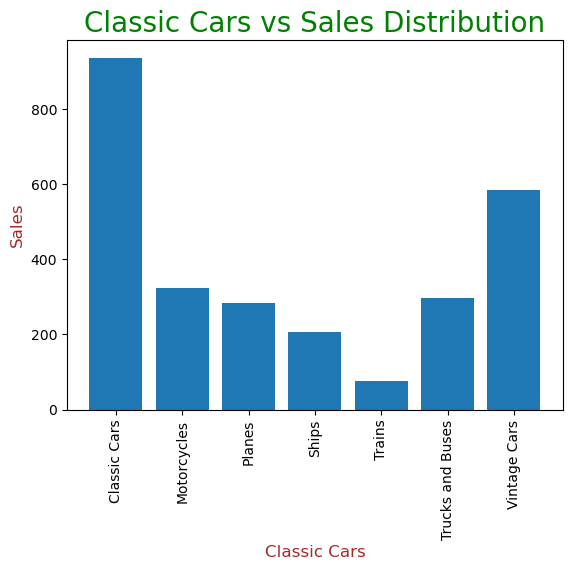

In [202]:
groupdata_product = sales_data.groupby('PRODUCTLINE')['SALES'].size()
#plot the data
plt.bar(groupdata_product.index,groupdata_product.values)
plt.xticks(rotation=90)
plt.title('Classic Cars vs Sales Distribution',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('Classic Cars',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.ylabel('Sales',fontdict={'fontsize':12,'fontweight':5,'color':'Brown'})
plt.show()

#Observation :* Which product lines generate the most sales? -> Classic Cars 

## Sales Distribution by Order Size

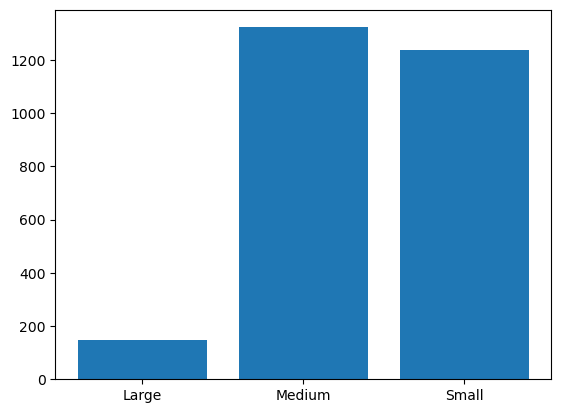

In [204]:
groupdata_dealsize = sales_data.groupby('DEALSIZE')['SALES'].size()
plt.bar(groupdata_dealsize.index,groupdata_dealsize.values)
plt.show()

#Observation : Most of deals were medium to Small size

## Top Customers by Sales:

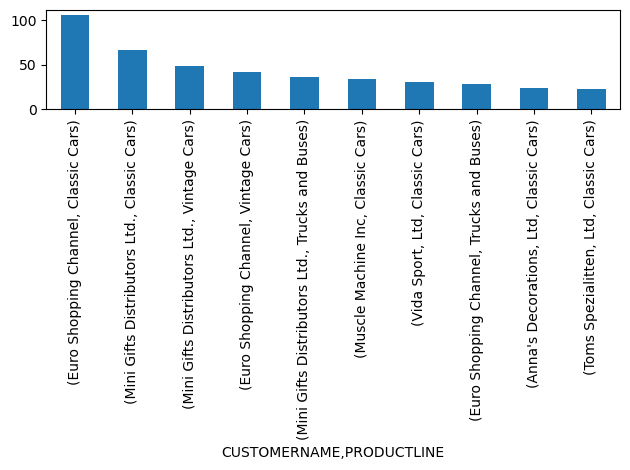

In [228]:
grouped_data = sales_data.groupby(['CUSTOMERNAME', 'PRODUCTLINE']).size().sort_values(ascending=False).head(10)
grouped_data.plot(kind='bar')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


#observation   
 #1. Top customer in terms of sales numbers is Euro Shopping Channel
 #2. Classic Cars and Vintage cars are most in demand product line among top 10 customers.